# Model Evaluation – SVM Face Mask Detection

This notebook evaluates the trained **SVM classifier** using standard
classification metrics on a held-out test set.

**Metrics used:**
- Accuracy
- Precision
- Recall
- F1-score
- Confusion Matrix

In [1]:
import os, sys, cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

sys.path.append(os.path.abspath('..'))
from src.feature_extractor import extract_features

## Load Dataset and Extract Features

In [2]:
DATASET_DIR = '../dataset'
CATEGORIES = {'with_mask': 1, 'without_mask': 0}

X, y = [], []

for category, label in CATEGORIES.items():
    folder = os.path.join(DATASET_DIR, category)
    for fname in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, fname))
        if img is None: continue
        X.append(extract_features(img))
        y.append(label)

X = np.array(X)
y = np.array(y)

print('Samples:', X.shape[0])
print('Feature dimension:', X.shape[1])

Samples: 500
Feature dimension: 1922


## Train-Test Split (Evaluation)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Load Trained SVM Model

In [4]:
model = joblib.load('../models/svm_model.pkl')
print('Loaded trained SVM model')

Loaded trained SVM model


## Evaluation Metrics

In [5]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.4f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=['No Mask', 'Mask']))

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

     No Mask       1.00      1.00      1.00        50
        Mask       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



## Confusion Matrix

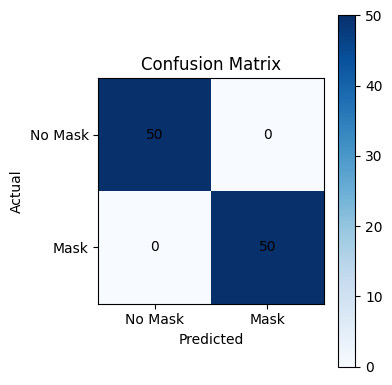

In [6]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,4))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0,1], ['No Mask', 'Mask'])
plt.yticks([0,1], ['No Mask', 'Mask'])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

## Conclusion

The evaluation metrics show that the SVM classifier performs reliably on
CNN-extracted features. Accuracy and F1-score indicate good generalization
for face mask detection.